# Stats packages

    1. pandas       -- a package for handling and cleaning data
    2. statsmodels  -- contains many useful statistical models such as linear regression
    3. seaborn      -- a useful library for making pretty plots
    4. scipy.stats  -- contains good functions for evaluating and sampling from common distributions
    5. sklearn      -- library of machine learning algorithms

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import load_boston

# Regression

Suppose you’re a realtor and you want to determine a fair price for a home to sell.  One option is to look at the distribution of all home prices $Y$ and take the mean.  However, there is a huge variability in this distribution because houses differ in size, location, age, and other factors.  A better approach would be to take these factors $X$ into account, by looking at the joint distribution of $(X,Y)$ and then taking the mean of the conditional distribution $p(y|X=x)$ for when $X = x$ (i.e. for the specific home).  In other words, we want to estimate the regression function

$$
    r(x) = \mathbb{E}[Y|X=x]
$$

Instead of estimating the conditional mean, we could estimate some other property of the conditional distribution $p(y|X=x)$ such as the median or other quantiles.  This approach is called quantile regression and can be more robust to outliers.


The goal of regression is to understand the relationship between the features or covariates $X$ with some response or target variables $Y$.  Broadly speaking, there are 2 main applications of regression:

1. **Prediction**       -- given new data $x^*$ predict the corresponding target value $y^*$.  This is most commonly used in machine learning.

2. **Causal inference** -- determine a causal relationship between the covariates $x$ and the response $y$.  This is primarily of interest in econometrics, public policy, social science, and medical fields.  This is generally a harder problem than prediction because we need to identify an explicit dependency of the response on the covariates.

The difference between the 2 applications can be summarized with: ``correlation is not causation``


In either case, regression tries to explain variations in the data $Y$ using the model $r(x)$ and the features $X$.  Mathematically, the variance in $Y$ can be decomposed into variance due to noise and variance explained by the model using the *ANOVA* (analysis of variance) identity

$$
     \text{Var}(Y) = \underbrace{\mathbb{E}[\text{Var}(Y|X)]}_{\text{noise}} + \underbrace{\text{Var}(\mathbb{E}[Y|X])}_{\text{model}}
$$

## Linear Regression

So far, we have not specified how to actually learn the regression function $r(x)$ from pairs of data $(X_i,y_i)$. 


One approcah would be to actually compute the joint distribution $p(x,y)$, then compute the conditional distribution $p(y|X=x)$, and finally compute the mean $r(x) = \mathbb{E}[Y|X=x]$.  However, this is computationally expensive and requires lots of data.  Another approach is to parametrize the regression function $r(x) = r(x;\beta)$ and learn only the parameters.  For this we can use techniques from parametric inference.  This is what linear regression does.

$$
    \boxed{ \text{Linear regression model:}\quad r(x;\beta) = \beta^T \phi(x) }
$$

Here $\phi$ takes in a vector of features and returns a vector of transformed features.  The transformed features can be any function of the data (e.g. if you know $x$, then you also know $x^3 \sin(x)$), so you can just pretend that those were your features all along.  The key here is that $r(x;\beta)$ is a linear function in $\beta$.  A special case is simple linear regression, where

$$
r(x;\beta) = \beta_0 + \beta_1 x
$$


## Empirical Risk Minimization

To fit the parameters $\beta$ of the model, we want to find $\hat{\beta}$ to minimize the expectation of some criteria or loss function $L(\beta)$.

$$
\beta^* = \text{argmin}_{\beta}\quad \mathbb{E}\left[ L(r(X;\beta), Y) \right]
$$

The expected loss function is called the risk and so we would like to select $\beta$ to minimize the risk.  Of course, we cannot actually compute the expected value, so we need to replace the expectation with a sample approximation with the data we already have.  This leads to something called **Empirical Risk Minimization** and is extremely popular in statistical learning theory

$$
\boxed{ \text{ERM:}\qquad \hat{\beta} = \text{argmin}_{\beta}\quad \frac{1}{n}\sum_{i=1}^n L(r(X_i;\beta), y_i)}
$$

## Ordinary Least Squares

The most common choice of loss function is the squared loss function $L(r(x;\beta),y) = \|r(x;\beta) - y\|^2$ because it is differentiable and the derivative is easy to compute.  For simple linear regression and the squared loss function, the estimator becomes the OLS estimator

$$
\hat{\beta}^{\text{OLS}} = \text{argmin}_{\beta}\quad \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2
$$

and we can derive a closed form solution for this estimator using linear algebra.

# Predicting Housing Prices

In [2]:
# Load the data and get a description of the dataset.
dataset = load_boston()
print(dataset.DESCR)

# Store the data in a Pandas dataframe.
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# Print out the features.
print(data)

# Save the target variable.
y = pd.DataFrame(dataset.target, columns = ['MEDV'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Model

Use a simple linear model that only considers the number of rooms in the price of the house.

$$
    \text{MEDV}_i = \beta_0 + \beta_1 \text{RM}_i + \epsilon_i
$$

In [3]:
# Add a constant for the intercept.
data['const'] = 1.

# Fit a linear model using only the number of rooms and the intercept.
results = sm.OLS(y, data[['const','RM']]).fit()
beta_0 = results.params[0]
beta_1 = results.params[1]

# Get a summary of the regression results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.49e-74
Time:                        16:16:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Var(Y)      = 84.587
Var(E[Y|X]) = 40.900
E[Var(Y|X)] = 43.687

 ANOVA identity:
 Var(E[Y|X]) + E[Var(Y|X)] = 84.587


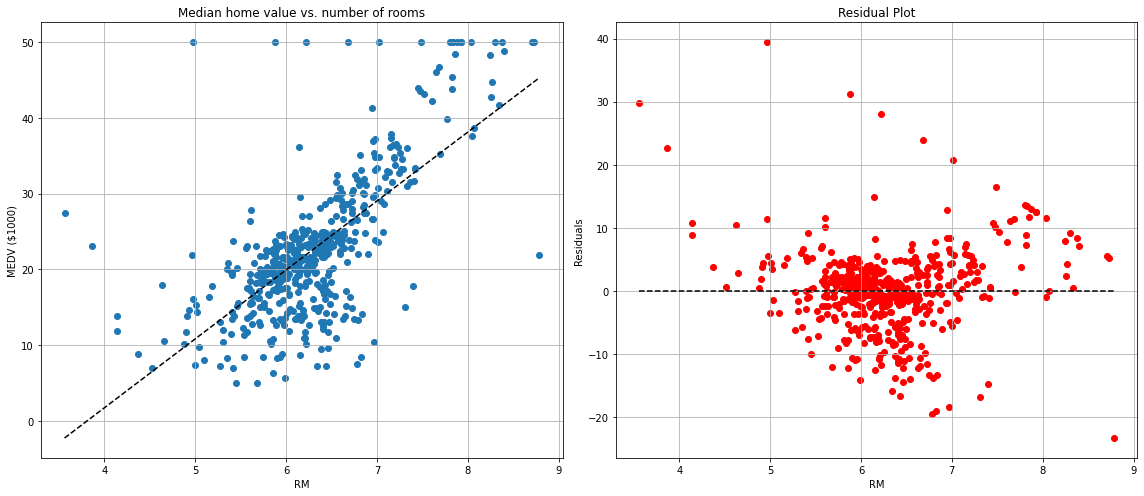

In [4]:
# Get the predicted values of y
x = data['RM'].values
ypred = beta_0 + beta_1*x
# Compute the residuals
resid = y['MEDV'].values - ypred

# Make a scatter plot of the data and plot the regression line.


fig, ax = plt.subplots(1,2,figsize=(16,7),sharex=True)
ax[0].scatter(x, y)
ax[0].set_xlabel('RM')
ax[0].set_ylabel('MEDV ($1000)')
ax[0].set_title('Median home value vs. number of rooms')
xx = np.linspace(np.min(data['RM']), np.max(data['RM']), 10)

ax[0].plot(xx, beta_0 + beta_1*xx, 'k--')
ax[0].grid();

ax[1].scatter(x, resid, color = 'r')
ax[1].plot(xx, np.zeros(xx.shape), 'k--')
ax[1].grid()
ax[1].set_xlabel('RM')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residual Plot')
plt.tight_layout()


# Compute the variance of the target.
var_y = np.std(y['MEDV'].values, ddof = 1)**2
var_m = np.std(ypred, ddof = 1)**2
var_e = np.std(resid, ddof = 1)**2

print('Var(Y)      = {:0.3f}'.format(var_y))
print('Var(E[Y|X]) = {:0.3f}'.format(var_m))
print('E[Var(Y|X)] = {:0.3f}'.format(var_e))
print('\n ANOVA identity:\n Var(E[Y|X]) + E[Var(Y|X)] = {:0.3f}'.format(var_m + var_e))

# Practical considerations

## Multicollinearity

One problem that we can run into during regression when trying to estimate the parameters $\beta$ is that they might have huge standard errors.  If two features of the data are closely correlated, then it will be difficult to determine the effect of the response on one particular feature.  For example, suppose that $x_1$ is a person's height in cm and $x_2$ is the person's height in m.  We'll generate some fake data to see how the standard errors behave.

1. Data that is not colinear with $x_1$ and $x_2$ fixed

$$
    y = 20 + 2x_1 + 3x_2 + \epsilon,\quad \epsilon \sim N(0,\ 1)
$$


2. Data that is close to having multicollinearity, where $x_2 = 3x_1 + \eta$ and $\eta \sim N(0,\ 0.01)$

$$
    y = 20 + 2x_1 + x_2 + \epsilon,\quad \epsilon \sim N(0,1)
$$

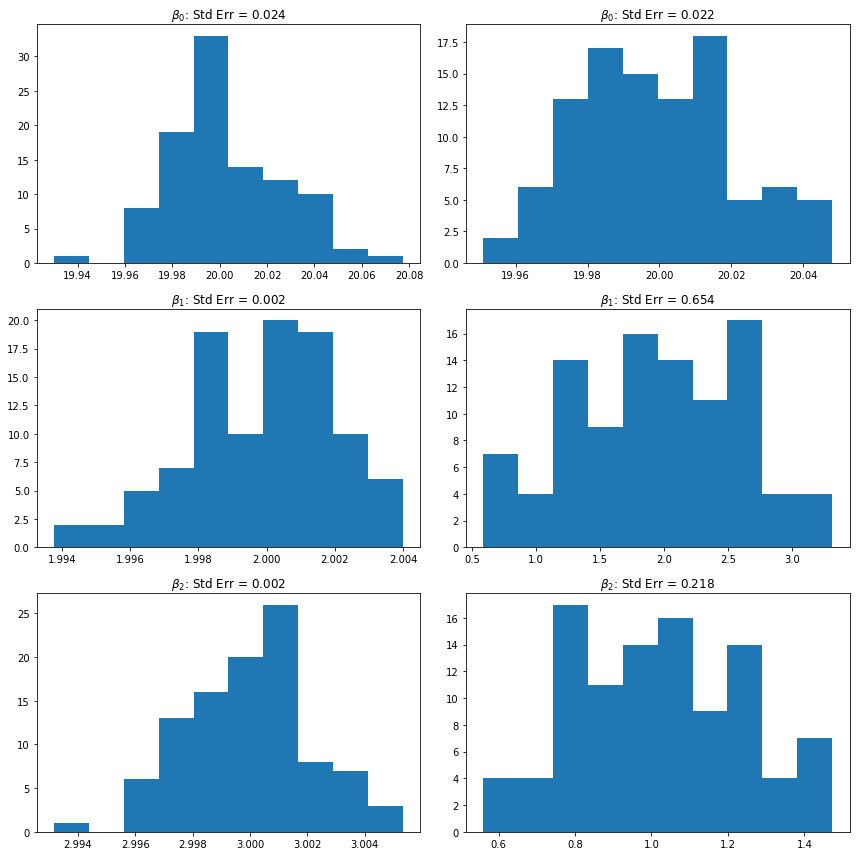

In [5]:
n = 2000 # sample size

trials = 100

beta = np.zeros((3,2,trials))



for t in range(trials):
    # Set up first model.
    x1 = 10*np.random.randn(n)
    x2 = 10*np.random.randn(n)
    eps = np.random.randn(n)
    y = 20 + 2*x1 + 3*x2 + eps
    # Compute estimates.
    X = np.array([np.ones(n), x1, x2]).T
    # Fit the model
    results = sm.OLS(y, X).fit()
    beta[0,0,t] = results.params[0]
    beta[1,0,t] = results.params[1]
    beta[2,0,t] = results.params[2]
    
    # Set up second model.
    x1 = 10*np.random.randn(n)
    x2 = 3*x1 + np.sqrt(0.01)*np.random.randn(n)
    eps = np.random.randn(n)
    y = 20 + 2*x1 + x2 + eps
    # Compute estimates.
    X = np.array([np.ones(n), x1, x2]).T
    # Fit the model
    results = sm.OLS(y, X).fit()
    beta[0,1,t] = results.params[0]
    beta[1,1,t] = results.params[1]
    beta[2,1,t] = results.params[2]

# Plot the results.
fig, ax = plt.subplots(3,2,figsize=(12,12))

# Loop over the betas
for i in range(3):
    # Loop over the different models.
    for j in range(2):
        ax[i,j].hist(beta[i,j])
        ax[i,j].set_title(r'$\beta_{:d}$: Std Err = {:0.3f}'.format(i, np.std(beta[i,j],ddof=1)))
plt.tight_layout();

# Uncertainty in Predictions

Suppose we want to make a prediction for $\hat{y}$ given a new data point $x^*$.  Using our fitted model we would get

$$
    \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x^*
$$

so the distribution of our prediction would depend on the data set $(x_i, y_i)$ through the coefficients $\hat{\beta}_0,\hat{\beta}_1$.  We can write down a $100(1-\alpha)$% confidence interval for what the prediction $\hat{y}$ will be as

$$
    \hat{y} \pm \Phi^{-1}(1-\alpha/2) \sqrt{ \widehat{\mathrm{se}}(\hat{y}) }
$$

However, the true value $y^*$ will not be exactly equal to the prediction $y^*$.

A **prediction interval** is an interval that contains the true value of $y^*$ $100(1-\alpha)$% of the time.

Confidence interval for y_hat:  0.3%
Prediction interval for y_star:  96.3%


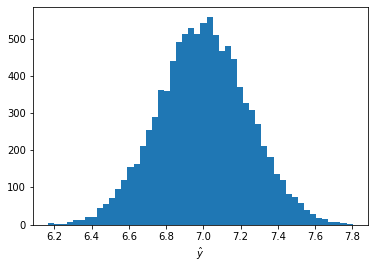

In [6]:
np.random.seed(914)

def fit_linear(x, y):
    n = len(x)
    xbar = np.mean(x)
    ybar = np.mean(y)
    b1 = np.mean((x-xbar)*(y-ybar))/np.mean((x - xbar)**2)
    b0 = ybar - b1*xbar
    s2 = np.sum((y - b0 - b1*x)**2)/(n-2)
    return (b0, b1, s2)


def std_err_yhat(x, b0, b1, s2, x_star):
    n = len(x)
    var_b1 = s2/(np.sum((x-np.mean(x))**2))
    var_b0 = var_b1*np.mean(x**2)
    cov_b0_b1 = -np.mean(x)*var_b1
    var_yhat = var_b1*x_star**2 + var_b0 + 2*x_star*cov_b0_b1
    return np.sqrt(var_yhat)
    
    
def prediction_error(x, s2, x_star):
    xi2 = s2*(1 + np.mean((x - x_star)**2)/(n*np.std(x)**2))
    return np.sqrt(xi2)
    
# True model
f = lambda x: 3*x + 1

# Make a prediction
trials = 10000
n = 25
noise = 1 # Std. dev. of noise

alpha = 0.1 # 90% prediction interval
za2 = stats.norm.ppf(1 - alpha/2)


y_hat = np.zeros(trials)

y_hat_interval = np.zeros(trials)
y_star_interval = np.zeros(trials)

x_star = 2.
y_star = f(x_star) + noise*np.random.randn()

for i in range(trials):
    # Generate synthetic data
    x = np.linspace(-5., 5., n)
    y = f(x) + noise*np.random.randn(n)
    # Fit a linear model
    b0, b1, s2 = fit_linear(x, y)
    # Estimate the std. err. of y_hat
    se_yhat = std_err_yhat(x, b0, b1, s2, x_star)
    y_hat[i] = b0 + b1*x_star
    if np.abs(y_star - y_hat[i]) <= za2*se_yhat:
        y_hat_interval[i] = 1.
    # Compute the prediction interval
    xi = prediction_error(x, s2, x_star)
    if np.abs(y_star - y_hat[i]) <= za2*xi:
        y_star_interval[i] = 1.

print("Confidence interval for y_hat:  {:0.1f}%".format(100*np.mean(y_hat_interval)))
print("Prediction interval for y_star:  {:0.1f}%".format(100*np.mean(y_star_interval)))
plt.hist(y_hat, bins=50)
plt.xlabel(r'$\hat{y}$');

# Beyond linear regression

Lasso and variable selection
Ridge regression
Neural networks